In [1]:
import sys
sys.path.append('../')
sys.path.append('/Users/sdbykov/work/my_packages/nway')

In [2]:
from scripts.utils import data_path, set_mpl
from scripts.cross_match_scripts import fits_to_pandas, pandas_to_fits, assess_goodnes_nway_cross_match
import pandas as pd
import numpy as np
import seaborn as sns
import nway_python_api as nway
%matplotlib inline

This is NWAY Python API
nwaylib file /Users/sdbykov/work/my_packages/nway/nwaylib/__init__.py


# Nway run in photometric prior mode

In [3]:
magnitude_columns = [
                    ('mag_g_orig', 'auto'),
                    ('mag_r_orig', 'auto'),
                    ('mag_z_orig', 'auto'),
                    ('mag_w1_orig', 'auto'),
                    ('mag_w2_orig', 'auto'),
                    ('mag_w3_orig', 'auto'),
                    ('mag_w4_orig', 'auto'),
                    ('col_gr_orig', 'auto'),
                    ('col_rz_orig', 'auto'),
                    ('col_gz_orig', 'auto'),
                    ('col_zw1_orig', 'auto'),
                    ('col_rw2_orig', 'auto'),
                    ('col_w1w2_orig', 'auto'),
                    ('col_zw3_orig', 'auto'),
                    ('col_rw4_orig', 'auto'),
                    ('col_w3w4_orig', 'auto')
                    ]

ero_table = nway.table_from_fits(data_path+'ERO_lhpv_03_23_sd01_a15_g14.fits')
ero_random_table = nway.table_from_fits(data_path+'ERO_lhpv_03_23_sd01_a15_g14_shifted.fits')
desi_table = nway.table_from_fits(data_path+'desi_lh.fits', poserr_value=0.1, magnitude_columns=magnitude_columns)
ero_pandas = fits_to_pandas('ERO_lhpv_03_23_sd01_a15_g14.fits')
desi_pandas = fits_to_pandas('desi_lh.fits')

ero_ctps_pandas = pd.read_pickle(data_path+'validation_ctps_ero_desi_lh.pkl')
ero_pandas = ero_pandas.merge(ero_ctps_pandas, on='ID', how='left')

nway_args = {'match_radius':30, 'prior_completeness':1, 'magauto_post_single_minvalue':0.7 }

ero_pandas


,EROSITA,ID,RA,DEC,pos_err,ML_FLUX_0,desi_id_true_ctp
0,0,b'SRGe J103744.3+571156',159.434594,57.198788,0.802682,3.284168e-12,NaN
1,1,b'SRGe J110137.5+572926',165.406353,57.490464,0.843224,1.969860e-12,NaN
2,2,b'SRGe J105825.0+564723',164.604366,56.789762,4.574190,1.817511e-12,NaN
3,3,b'SRGe J110537.6+585120',166.406669,58.855424,0.816664,1.505411e-12,NaN
4,4,b'SRGe J102349.9+563347',155.958041,56.563186,0.797151,1.001123e-12,NaN
...,...,...,...,...,...,...,...
9495,9495,b'SRGe J102315.1+561957',155.813071,56.332561,4.828206,1.637604e-15,NaN
9496,9496,b'SRGe J102332.5+562524',155.885436,56.423270,3.936292,1.608667e-15,NaN
9497,9497,b'SRGe J102235.0+561919',155.645874,56.321872,3.697835,1.595806e-15,NaN
9498,9498,b'SRGe J102223.5+562357',155.597875,56.399058,4.029289,1.532857e-15,NaN


    adding angular separation columns
matching: 152204 matches after filtering by search radius
Primary catalogue "EROSITA" (9500), density gives 2.13e+07 objects on entire sky
Catalogue "DESI" (2418574), density gives 2.39e+09 objects on entire sky
Computing distance-based probabilities ...
    correcting for unrelated associations ...
100%|██████████| 9500/9500 [00:02<00:00, 3214.62it/s]
Incorporating bias "DESI:mag_g_orig" ...
magnitude histogram of column "DESI_mag_g_orig": 4681 secure matches, 29880 insecure matches and 2340404 secure non-matches of 2418574 total entries (2369647 valid)


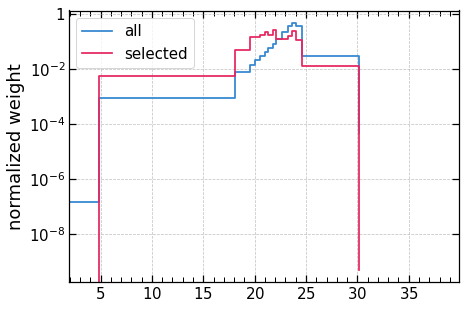

Incorporating bias "DESI:mag_r_orig" ...
magnitude histogram of column "DESI_mag_r_orig": 4721 secure matches, 29880 insecure matches and 2376115 secure non-matches of 2418574 total entries (2405790 valid)


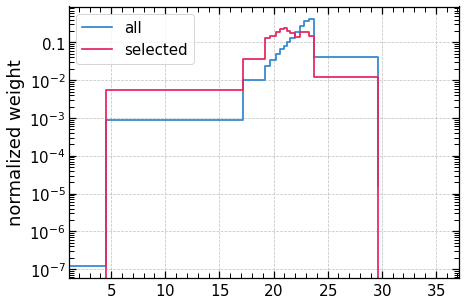

/Users/sdbykov/work/my_packages/nway/nwaylib/__init__.py:376: RuntimeWarning: divide by zero encountered in log10
  weights = log10(func(magcol))
Incorporating bias "DESI:mag_z_orig" ...
magnitude histogram of column "DESI_mag_z_orig": 4731 secure matches, 29880 insecure matches and 2372871 secure non-matches of 2418574 total entries (2402445 valid)


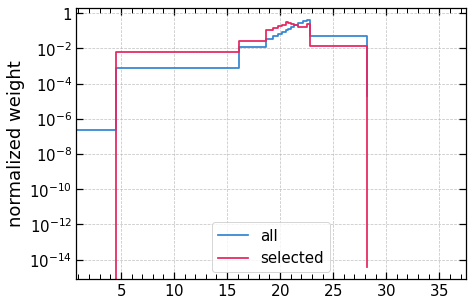

Incorporating bias "DESI:mag_w1_orig" ...
magnitude histogram of column "DESI_mag_w1_orig": 4562 secure matches, 29880 insecure matches and 2095535 secure non-matches of 2418574 total entries (2122208 valid)


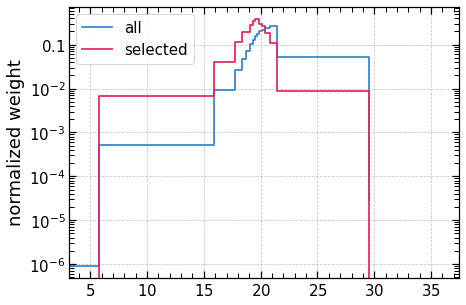

Incorporating bias "DESI:mag_w2_orig" ...
magnitude histogram of column "DESI_mag_w2_orig": 4458 secure matches, 29880 insecure matches and 1811078 secure non-matches of 2418574 total entries (1835449 valid)


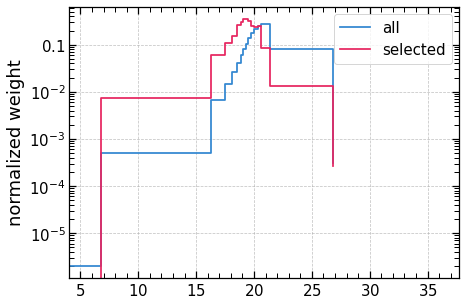

Incorporating bias "DESI:mag_w3_orig" ...
magnitude histogram of column "DESI_mag_w3_orig": 3619 secure matches, 29880 insecure matches and 1202868 secure non-matches of 2418574 total entries (1220608 valid)


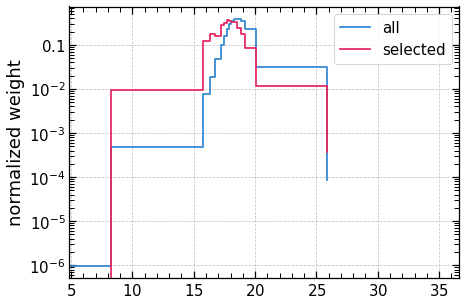

Incorporating bias "DESI:mag_w4_orig" ...
magnitude histogram of column "DESI_mag_w4_orig": 2974 secure matches, 29880 insecure matches and 1168176 secure non-matches of 2418574 total entries (1183965 valid)


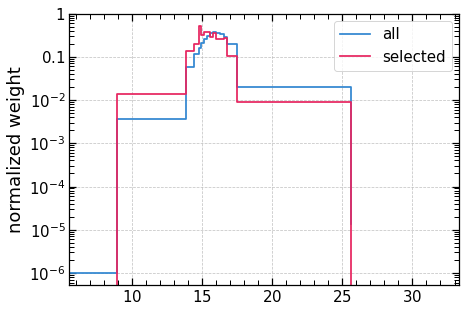

Incorporating bias "DESI:col_gr_orig" ...
magnitude histogram of column "DESI_col_gr_orig": 4664 secure matches, 29880 insecure matches and 2332955 secure non-matches of 2418574 total entries (2362107 valid)


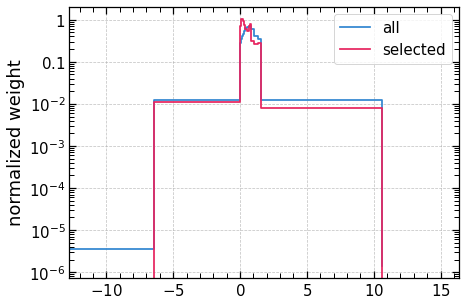

Incorporating bias "DESI:col_rz_orig" ...
magnitude histogram of column "DESI_col_rz_orig": 4703 secure matches, 29880 insecure matches and 2361243 secure non-matches of 2418574 total entries (2390680 valid)


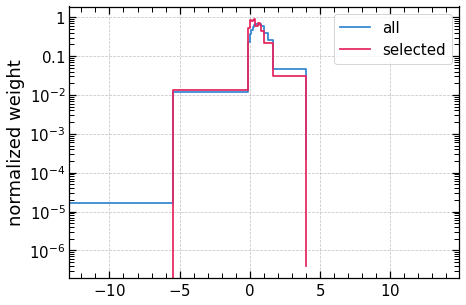

Incorporating bias "DESI:col_gz_orig" ...
magnitude histogram of column "DESI_col_gz_orig": 4660 secure matches, 29880 insecure matches and 2325741 secure non-matches of 2418574 total entries (2354738 valid)


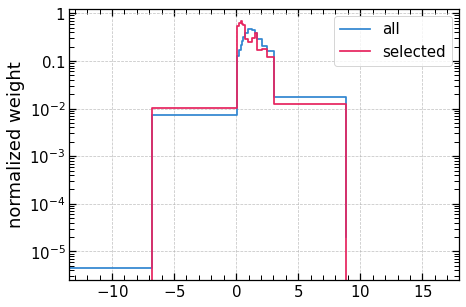

Incorporating bias "DESI:col_zw1_orig" ...
magnitude histogram of column "DESI_col_zw1_orig": 4549 secure matches, 29880 insecure matches and 2088728 secure non-matches of 2418574 total entries (2115295 valid)


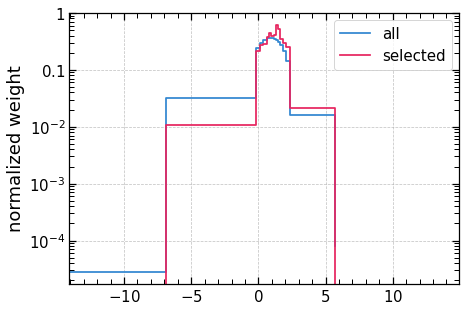

Incorporating bias "DESI:col_rw2_orig" ...
magnitude histogram of column "DESI_col_rw2_orig": 4434 secure matches, 29880 insecure matches and 1802432 secure non-matches of 2418574 total entries (1826700 valid)


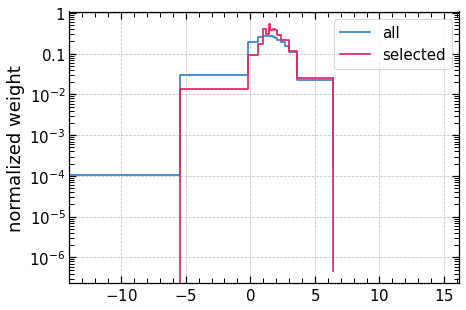

Incorporating bias "DESI:col_w1w2_orig" ...
magnitude histogram of column "DESI_col_w1w2_orig": 4405 secure matches, 29880 insecure matches and 1708207 secure non-matches of 2418574 total entries (1731660 valid)


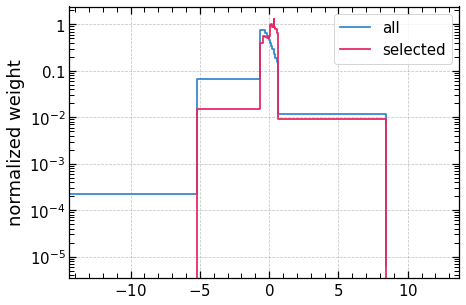

Incorporating bias "DESI:col_zw3_orig" ...
magnitude histogram of column "DESI_col_zw3_orig": 3606 secure matches, 29880 insecure matches and 1196277 secure non-matches of 2418574 total entries (1213905 valid)


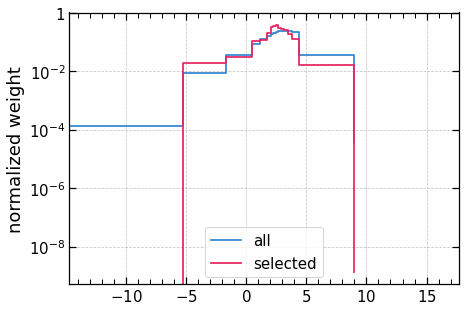

Incorporating bias "DESI:col_rw4_orig" ...
magnitude histogram of column "DESI_col_rw4_orig": 2951 secure matches, 29880 insecure matches and 1162390 secure non-matches of 2418574 total entries (1178107 valid)


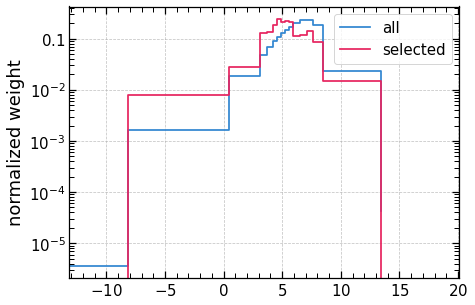

Incorporating bias "DESI:col_w3w4_orig" ...
magnitude histogram of column "DESI_col_w3w4_orig": 2396 secure matches, 29880 insecure matches and 602869 secure non-matches of 2418574 total entries (612755 valid)


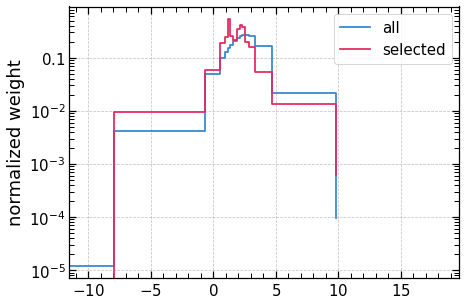


Computing final probabilities ...
    grouping by primary catalogue ID and flagging ...


In [4]:

nway_res_ero = nway.nwaylib.nway_match(
[ero_table, desi_table],
**nway_args
)


    adding angular separation columns
matching: 112369 matches after filtering by search radius
Primary catalogue "EROSITA" (8175), density gives 1.83e+07 objects on entire sky
Catalogue "DESI" (2418574), density gives 2.39e+09 objects on entire sky
Computing distance-based probabilities ...
    correcting for unrelated associations ...
100%|██████████| 8175/8175 [00:02<00:00, 3116.54it/s]
Incorporating bias "DESI:mag_g_orig" ...
magnitude histogram of column "DESI_mag_g_orig": 706 secure matches, 15650 insecure matches and 2354314 secure non-matches of 2418574 total entries (2369647 valid)


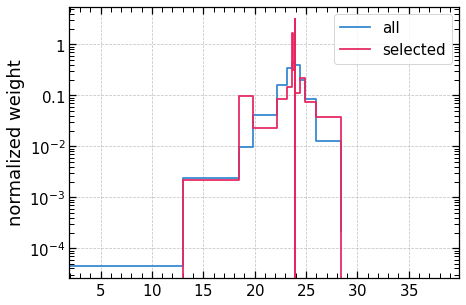

/Users/sdbykov/work/my_packages/nway/nwaylib/__init__.py:376: RuntimeWarning: divide by zero encountered in log10
  weights = log10(func(magcol))
Incorporating bias "DESI:mag_r_orig" ...
magnitude histogram of column "DESI_mag_r_orig": 722 secure matches, 15650 insecure matches and 2390210 secure non-matches of 2418574 total entries (2405790 valid)


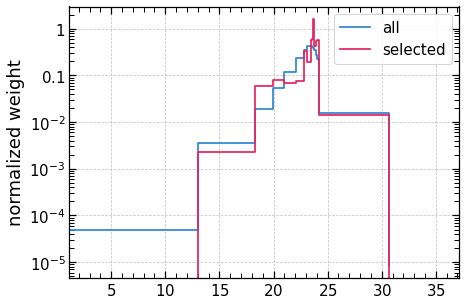

Incorporating bias "DESI:mag_z_orig" ...
magnitude histogram of column "DESI_mag_z_orig": 720 secure matches, 15650 insecure matches and 2386880 secure non-matches of 2418574 total entries (2402445 valid)


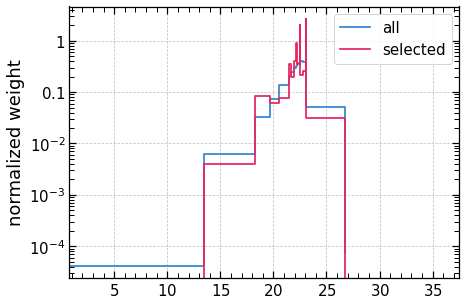

Incorporating bias "DESI:mag_w1_orig" ...
magnitude histogram of column "DESI_mag_w1_orig": 646 secure matches, 15650 insecure matches and 2108443 secure non-matches of 2418574 total entries (2122208 valid)


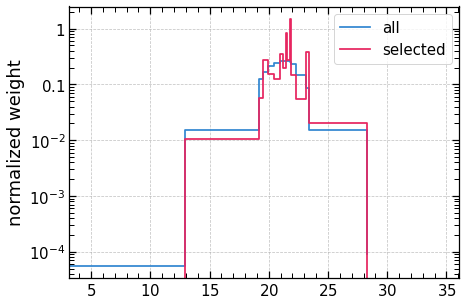

Incorporating bias "DESI:mag_w2_orig" ...
magnitude histogram of column "DESI_mag_w2_orig": 542 secure matches, 15650 insecure matches and 1823495 secure non-matches of 2418574 total entries (1835449 valid)


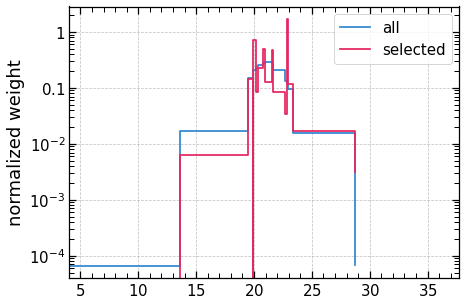

Incorporating bias "DESI:mag_w3_orig" ...
magnitude histogram of column "DESI_mag_w3_orig": 363 secure matches, 15650 insecure matches and 1212797 secure non-matches of 2418574 total entries (1220608 valid)


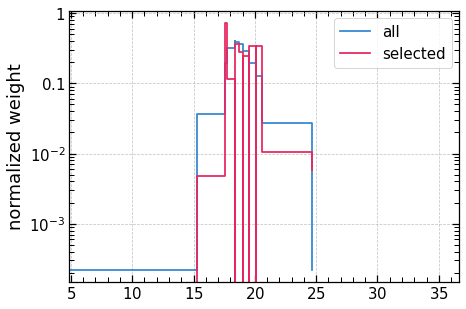

Incorporating bias "DESI:mag_w4_orig" ...
magnitude histogram of column "DESI_mag_w4_orig": 365 secure matches, 15650 insecure matches and 1176248 secure non-matches of 2418574 total entries (1183965 valid)


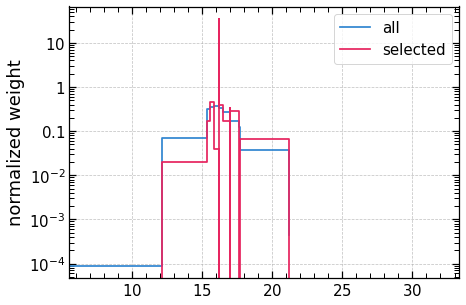

Incorporating bias "DESI:col_gr_orig" ...
magnitude histogram of column "DESI_col_gr_orig": 704 secure matches, 15650 insecure matches and 2346815 secure non-matches of 2418574 total entries (2362107 valid)


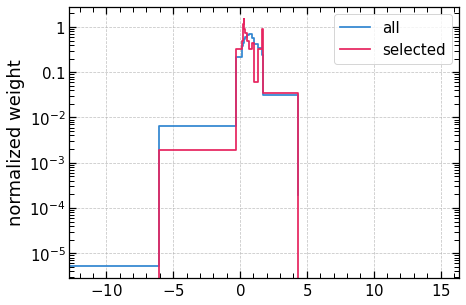

Incorporating bias "DESI:col_rz_orig" ...
magnitude histogram of column "DESI_col_rz_orig": 717 secure matches, 15650 insecure matches and 2375184 secure non-matches of 2418574 total entries (2390680 valid)


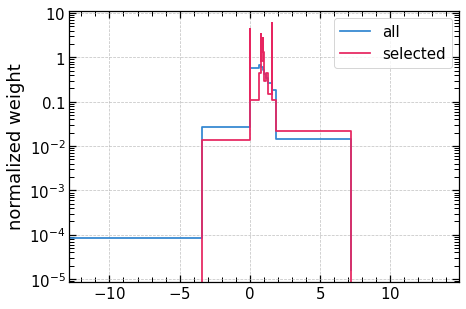

Incorporating bias "DESI:col_gz_orig" ...
magnitude histogram of column "DESI_col_gz_orig": 702 secure matches, 15650 insecure matches and 2339485 secure non-matches of 2418574 total entries (2354738 valid)


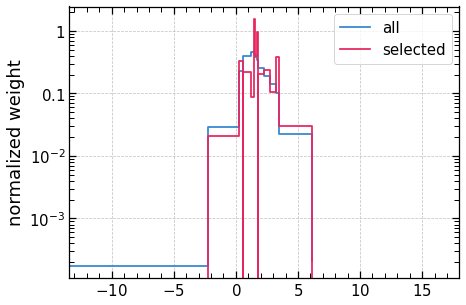

Incorporating bias "DESI:col_zw1_orig" ...
magnitude histogram of column "DESI_col_zw1_orig": 645 secure matches, 15650 insecure matches and 2101574 secure non-matches of 2418574 total entries (2115295 valid)


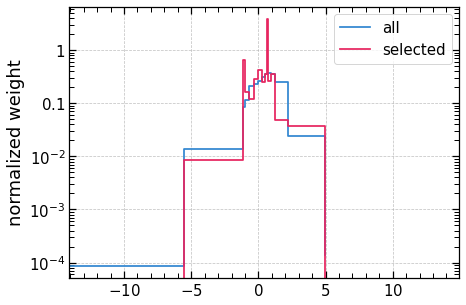

Incorporating bias "DESI:col_rw2_orig" ...
magnitude histogram of column "DESI_col_rw2_orig": 539 secure matches, 15650 insecure matches and 1814797 secure non-matches of 2418574 total entries (1826700 valid)


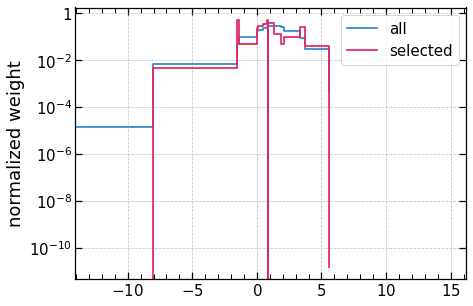

Incorporating bias "DESI:col_w1w2_orig" ...
magnitude histogram of column "DESI_col_w1w2_orig": 516 secure matches, 15650 insecure matches and 1720420 secure non-matches of 2418574 total entries (1731660 valid)


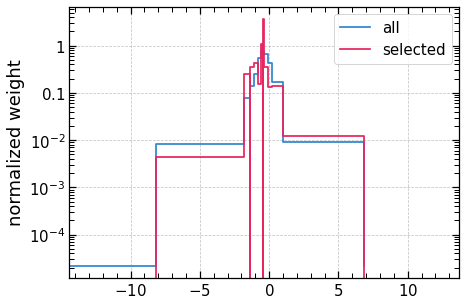

Incorporating bias "DESI:col_zw3_orig" ...
magnitude histogram of column "DESI_col_zw3_orig": 360 secure matches, 15650 insecure matches and 1206124 secure non-matches of 2418574 total entries (1213905 valid)


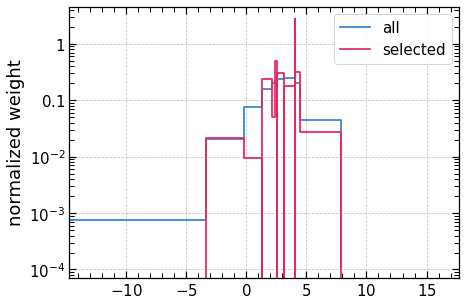

Incorporating bias "DESI:col_rw4_orig" ...
magnitude histogram of column "DESI_col_rw4_orig": 364 secure matches, 15650 insecure matches and 1170425 secure non-matches of 2418574 total entries (1178107 valid)


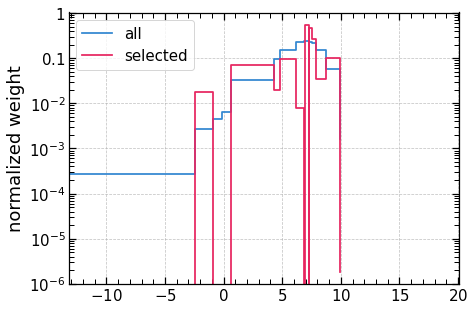

Incorporating bias "DESI:col_w3w4_orig" ...
magnitude histogram of column "DESI_col_w3w4_orig": 186 secure matches, 15650 insecure matches and 608849 secure non-matches of 2418574 total entries (612755 valid)


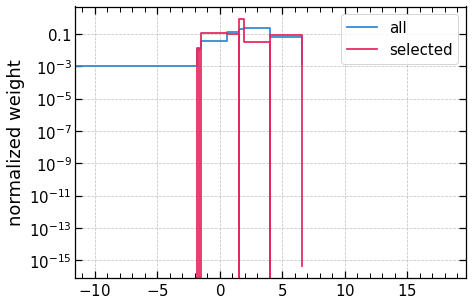


Computing final probabilities ...
    grouping by primary catalogue ID and flagging ...


In [5]:

nway_res_ero_random = nway.nwaylib.nway_match(
[ero_random_table, desi_table],
**nway_args
)


For a false detection rate of <5%
--> use only counterparts with p_any>0.64 (72.32% of matches)
The efficiency is 83.67%
The purity is  83.66%


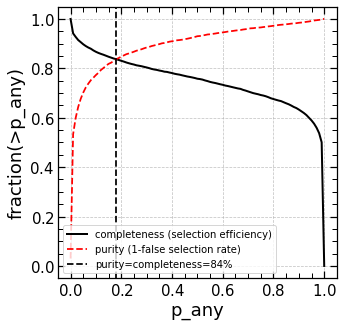

In [6]:
cutoffs, _, nway_purity = nway.calibrate_cutoff(nway_res_ero, nway_res_ero_random)
#plt.figure(figsize=(10,10))
#nway_res_ero.prob_has_match.hist(bins=100, alpha = 0.4)
#nway_res_ero_random.prob_has_match.hist(bins=100, alpha = 0.4)

## Asses the performance of the NWAY with validation catalog (CSC & XMM)

In [7]:
nway_res_ero  = nway_res_ero.merge(ero_pandas, on='EROSITA')
nway_res_ero  = nway_res_ero.merge(desi_pandas, on='DESI')
nway_res_ero.sort_values(by=['EROSITA', 'prob_this_match' ], inplace=True, ascending=[True, False])
#nway_res_ero.to_pickle(data_path+'ERO_lhpv_03_23_sd01_a15_g14_nway.pkl')

NWAY PERFOMANCE ON THE VALIDATION CATALOG
Completeness and purity for nway matching 
completeness = fraction of sources with prob_has_match > p 
purity = fraction of sources with prob_has_match > p and correct nway assignment
 Completeness = 91% 
 Purity = 91% 
 prob_has_match optimal cutoff =  0.3 
 Fraction of sources with prob_has_match > 0.3 = 82%
+++Statistics+++
687 X-ray sources in validation set with counterparts
--Out of those, 61 sources were assigned hostless (prob_has_match < 0.3) 
626 sources have prob_has_match > 0.3
Out of those 626: 
--570 sources have correct nway counterpart
--56 sources have incorrect nway counterpart


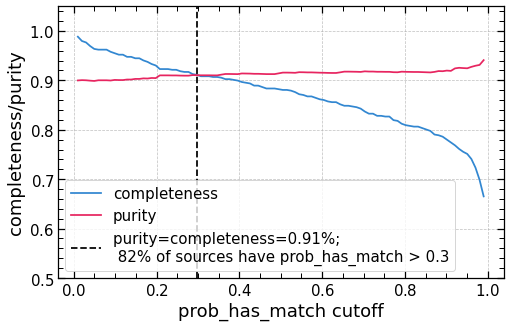

In [8]:
validation_df, p_any_cutoff = assess_goodnes_nway_cross_match(nway_res_ero)

<AxesSubplot:>

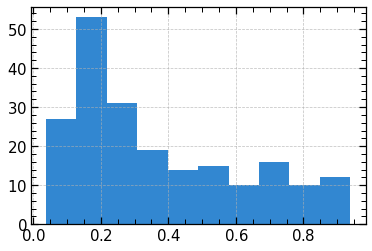

In [9]:
nway_res_ero.query("match_flag==1 & nnmag_grz!=-99.")['nnmag_grz'].hist()

In [10]:
validation_df.query('match_flag == True & desi_id!=desi_id_true_ctp & prob_has_match > 0.41')

,EROSITA,ID,pos_err,Separation_EROSITA_DESI,prob_has_match,prob_this_match,match_flag,desi_id,desi_id_true_ctp
1118,51,b'SRGe J104117.7+584929',0.851929,0.423018,0.999961,0.999997,1,b'9011_613766_39',b'9011_613766_43'
20004,1134,b'SRGe J103410.1+600639',3.515109,6.917330,0.995711,0.567174,1,b'9011_617450_3130',b'9011_617450_3136'
20883,1191,b'SRGe J103248.5+585748',1.774511,0.464231,0.999831,0.999997,1,b'9011_614509_3227',b'9011_614509_3219'
26241,1516,b'SRGe J104604.5+554430',1.667841,1.005961,0.999999,1.000000,1,b'9011_604375_859',b'9011_604375_855'
28121,1642,b'SRGe J104155.8+584500',1.751132,1.593202,0.999991,1.000000,1,b'9011_613766_1204',b'9011_613766_1201'
33789,2009,b'SRGe J104604.9+573514',1.757172,2.692366,0.999800,0.990732,1,b'9011_609947_251',b'9011_609947_275'
34824,2075,b'SRGe J105141.8+580100',2.425159,6.697378,0.999913,0.999954,1,b'9011_611494_2754',b'9011_611494_2691'
39455,2375,b'SRGe J104901.2+572604',1.841507,7.282302,0.988768,0.825965,1,b'9011_609948_2891',b'9011_609948_2927'
44576,2714,b'SRGe J103512.4+595613',3.705189,7.404806,0.640038,0.532313,1,b'9011_617451_1381',b'9011_617451_1374'
45431,2773,b'SRGe J104812.1+572600',2.613456,2.318761,0.998896,0.999905,1,b'9011_609948_910',b'9011_609948_928'


NWAY results for Source 1516:

This source probably has a counterpart (p_any=1.00)

Assuming it has a counterpart, we have the following possible associations:

Disclaimer: These results assume that the input (sky densities, positional errors, and priors) are correct.



,EROSITA,DESI,Separation_EROSITA_DESI,match_flag,prob_has_match,prob_this_match,ID,pos_err,desi_id_true_ctp,desi_id,nnmag_grzw1w2w3w4,nnmag_grzw1w2,nnmag_grz
26241,1516,95913,1.005961,1,0.999999,9.999998e-01,b'SRGe J104604.5+554430',1.667841,b'9011_604375_855',b'9011_604375_859',0.943712,-99.000000,-99.000000
26256,1516,2417458,2.221664,0,0.999999,1.708502e-07,b'SRGe J104604.5+554430',1.667841,b'9011_604375_855',b'9011_604375_855',-99.000000,-99.000000,-99.000000
26242,1516,469251,6.848700,0,0.999999,1.544732e-11,b'SRGe J104604.5+554430',1.667841,b'9011_604375_855',b'9011_604375_847',0.060488,-99.000000,-99.000000
26250,1516,1241758,10.313864,0,0.999999,1.269689e-13,b'SRGe J104604.5+554430',1.667841,b'9011_604375_855',b'9011_604375_823',-99.000000,0.326036,-99.000000
26249,1516,1091174,12.610228,0,0.999999,3.118614e-20,b'SRGe J104604.5+554430',1.667841,b'9011_604375_855',b'9011_604375_802',-99.000000,0.045998,-99.000000
26245,1516,703796,19.736497,0,0.999999,1.029558e-35,b'SRGe J104604.5+554430',1.667841,b'9011_604375_855',b'9011_604375_928',-99.000000,-99.000000,0.392033
26252,1516,2028526,20.830768,0,0.999999,3.107503e-39,b'SRGe J104604.5+554430',1.667841,b'9011_604375_855',b'9011_604375_932',-99.000000,0.056305,-99.000000
26248,1516,870390,23.626478,0,0.999999,2.843395e-49,b'SRGe J104604.5+554430',1.667841,b'9011_604375_855',b'9011_604375_950',0.241951,-99.000000,-99.000000
26246,1516,844717,24.637189,0,0.999999,4.595417e-54,b'SRGe J104604.5+554430',1.667841,b'9011_604375_855',b'9011_604375_951',-99.000000,-99.000000,0.089494
26254,1516,2209266,24.596856,0,0.999999,1.625221e-55,b'SRGe J104604.5+554430',1.667841,b'9011_604375_855',b'9011_604375_783',-99.000000,0.040517,-99.000000


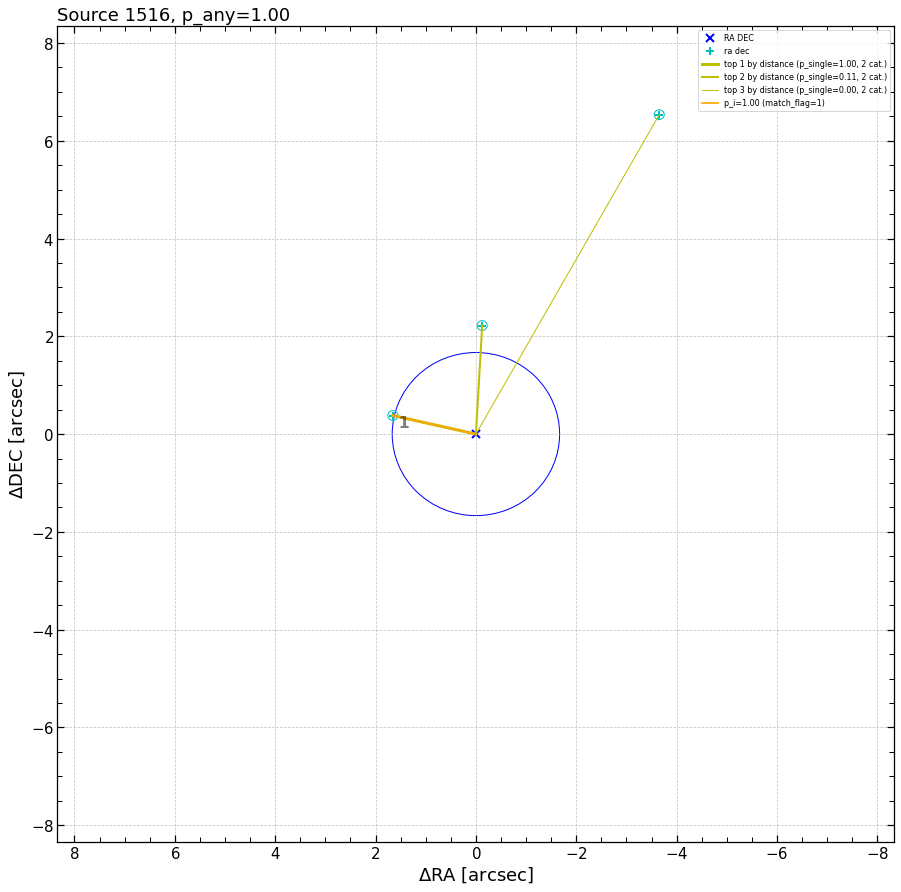

In [11]:

tmp_df = nway.explain(nway_res_ero, id = 1516, primary_id_col = 'EROSITA', cols_ra = ['RA', 'ra'], cols_dec=['DEC', 'dec'], cols_err = ['pos_err', 'desi_pos_err'],
tablenames = ['EROSITA', 'DESI'])
tmp_df[['EROSITA', 'DESI', 'Separation_EROSITA_DESI', 'match_flag',
       'prob_has_match', 'prob_this_match', 'ID', 'pos_err', 'desi_id_true_ctp', 'desi_id', 'nnmag_grzw1w2w3w4',
       'nnmag_grzw1w2', 'nnmag_grz']]

NWAY results for Source 5703:

This source probably has a counterpart (p_any=0.99)

Assuming it has a counterpart, we have the following possible associations:

Disclaimer: These results assume that the input (sky densities, positional errors, and priors) are correct.



,EROSITA,DESI,Separation_EROSITA_DESI,match_flag,prob_has_match,prob_this_match,ID,pos_err,desi_id_true_ctp,desi_id,nnmag_grzw1w2w3w4,nnmag_grzw1w2,nnmag_grz
88451,5703,350907,3.131846,1,0.994657,9.879504e-01,b'SRGe J104712.3+573818',3.30802,b'9011_610722_3957',b'9011_610722_3972',0.781308,-99.000000,-99.000000
88449,5703,89744,15.249542,0,0.994657,1.182199e-02,b'SRGe J104712.3+573818',3.30802,b'9011_610722_3957',b'9011_610722_3890',0.934946,-99.000000,-99.000000
88463,5703,1651558,5.066231,0,0.994657,1.202068e-04,b'SRGe J104712.3+573818',3.30802,b'9011_610722_3957',b'9011_610722_3970',-99.000000,-99.000000,0.417243
88473,5703,2191236,2.194155,0,0.994657,1.032178e-04,b'SRGe J104712.3+573818',3.30802,b'9011_610722_3957',b'9011_610722_3957',0.132395,-99.000000,-99.000000
88452,5703,397539,14.150633,0,0.994657,3.983618e-06,b'SRGe J104712.3+573818',3.30802,b'9011_610722_3957',b'9011_610722_3896',-99.000000,-99.000000,0.582881
88467,5703,1964610,10.866076,0,0.994657,7.724536e-08,b'SRGe J104712.3+573818',3.30802,b'9011_610722_3957',b'9011_610722_4024',0.103052,-99.000000,-99.000000
88471,5703,2152472,13.917861,0,0.994657,6.140295e-08,b'SRGe J104712.3+573818',3.30802,b'9011_610722_3957',b'9011_610722_3894',-99.000000,-99.000000,0.085438
88472,5703,2178586,11.173727,0,0.994657,1.286640e-08,b'SRGe J104712.3+573818',3.30802,b'9011_610722_3957',b'9011_610722_3985',-99.000000,0.023339,-99.000000
88457,5703,1093006,15.045461,0,0.994657,1.029395e-08,b'SRGe J104712.3+573818',3.30802,b'9011_610722_3957',b'9011_610722_3919',-99.000000,0.065586,-99.000000
88453,5703,484590,15.791188,0,0.994657,3.422445e-09,b'SRGe J104712.3+573818',3.30802,b'9011_610722_3957',b'9011_610722_3914',-99.000000,-99.000000,0.768630


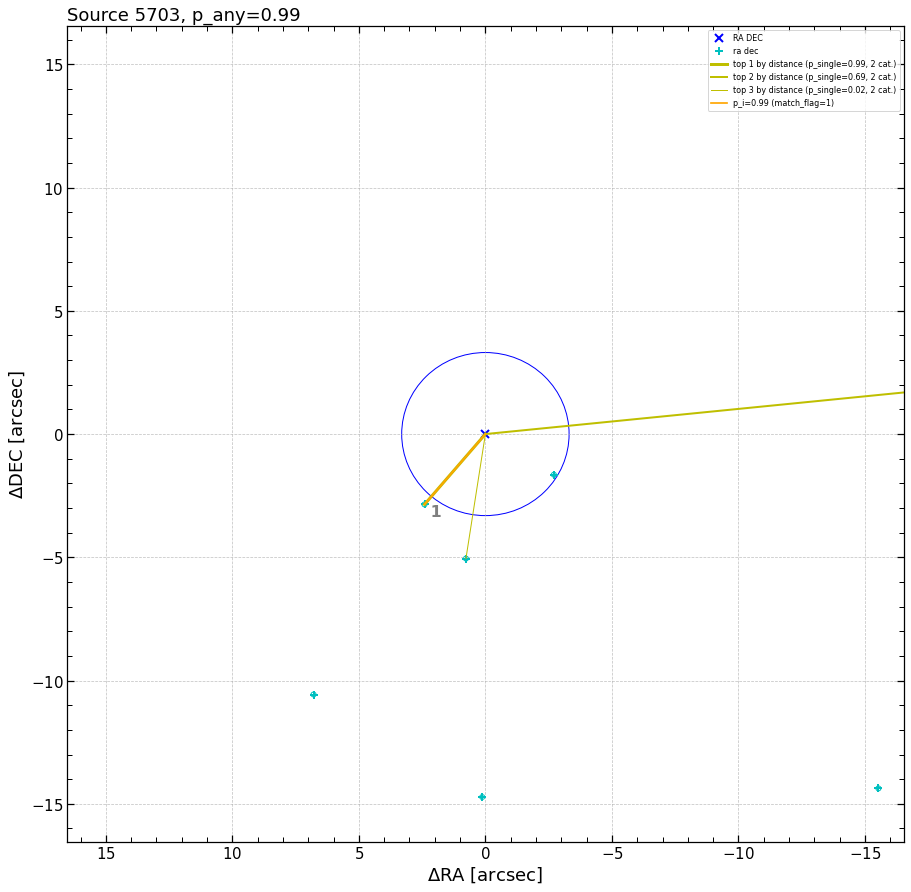

In [12]:
tmp_df = nway.explain(nway_res_ero, id = 5703, primary_id_col = 'EROSITA', cols_ra = ['RA', 'ra'], cols_dec=['DEC', 'dec'], cols_err = ['pos_err', 'desi_pos_err'],
tablenames = ['EROSITA', 'DESI'])
tmp_df[['EROSITA', 'DESI', 'Separation_EROSITA_DESI', 'match_flag',
       'prob_has_match', 'prob_this_match', 'ID', 'pos_err', 'desi_id_true_ctp', 'desi_id', 'nnmag_grzw1w2w3w4',
       'nnmag_grzw1w2', 'nnmag_grz']]